<a href="https://colab.research.google.com/github/AbdullahAlshamrani0/IDS/blob/main/HW4/Problem2Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Neccessuary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# Loading Dataset
# Load the dataset
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"
data = pd.read_csv(url)

In [ ]:
#Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.
saturated_fat = data.sort_values(by='saturated_fat', ascending=False).head(5)
print("A list of five food items highest in saturated fat:")
print(saturated_fat)

A list of five food items highest in saturated fat:
                                  food item  weight_in_grams  saturated_fat  \
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
581  CREME PIE                     1 PIE               910.0           90.1   
890  LARD                          1 CUP               205.0           80.4   

     cholesterol  
378         2053  
535          703  
458          609  
581           46  
890          195  


In [ ]:
#Create a new variable, saturated_fat_ per_gram, by dividing the amount of saturated fat by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?
data['saturated_fat_per_gram'] = data['saturated_fat'] / data['weight_in_grams'] # cala
top_saturated_fat_per_gram = data.sort_values(by='saturated_fat_per_gram', ascending=False).head(5)
print("Top 5 food items highest in saturated fat per gram:")
print(top_saturated_fat_per_gram)



Top 5 food items highest in saturated fat per gram:
                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP               14.0            7.1   
909  BUTTER; UNSALTED              1 TBSP               14.0            7.1   
710  BUTTER; UNSALTED              1/2 CUP             113.0           57.1   
709  BUTTER; SALTED                1/2 CUP             113.0           57.1   
913  BUTTER; UNSALTED              1 PAT                 5.0            2.5   

     cholesterol  saturated_fat_per_gram  
908           31                0.507143  
909           31                0.507143  
710          247                0.505310  
709          247                0.505310  
913           11                0.500000  


Food items as outliers at the high end of the scale:
                                  food item  weight_in_grams  saturated_fat  \
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
448  COCONUT; RAW; SHREDDED        1 CUP               80.00           23.8   
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP               93.00           29.3   
576  COCONUT; RAW; PIECE           1 PIECE             45.00           13.4   
709  BUTTER; SALTED                1/2 CUP            113.00           57.1   
710  BUTTER; UNSALTED              1/2 CUP            113.00           57.1   
890  LARD                          1 CUP              205.00           80.4   
898  FATS; COOKING/VEGETBL SHORTENG1 TBSP              13.00            3.3   
899  LARD                          1 TBSP              13.00            5.1   
907  FATS; COOKING/VEGETBL SHORTENG1 CUP              205.00           51.3   
908  BUTTER; SALTED                1 TBSP              14.00            7.1   

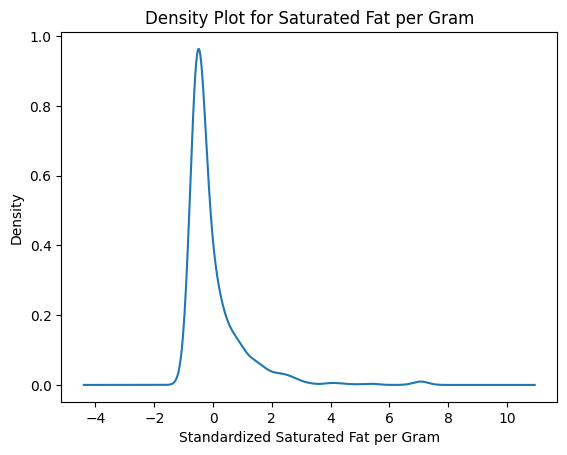

In [ ]:
#Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram
data['standardized_saturated_fat_per_gram'] = (data['saturated_fat_per_gram'] - data['saturated_fat_per_gram'].mean()) / data['saturated_fat_per_gram'].std()
high_end_outliers = data[data['standardized_saturated_fat_per_gram'] > 3]  # Adjust the threshold as needed
print("Food items as outliers at the high end of the scale:")
print(high_end_outliers)

#Ploting
data['standardized_saturated_fat_per_gram'].plot.kde()
plt.title("Density Plot for Saturated Fat per Gram")
plt.xlabel("Standardized Saturated Fat per Gram")
plt.show()



In [ ]:
#Are there any missing values? If so, impute as necessary and explain your approach.
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
food item                              0
weight_in_grams                        0
saturated_fat                          0
cholesterol                            0
saturated_fat_per_gram                 0
standardized_saturated_fat_per_gram    0
dtype: int64


In [ ]:
#Standardize (zero mean) the numeric variables, and determine if there are any outliers.
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = (data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std()
outliers = data[(np.abs(data[numeric_cols]) > 3).any(axis=1)]  # Adjust the threshold as needed
print("Outliers in numeric variables:")
print(outliers)


Outliers in numeric variables:
                                  food item  weight_in_grams  saturated_fat  \
45   BEEF LIVER; FRIED             3 OZ            -0.366151      -0.138456   
210  CHOCOLATE; BITTER OT BAKING   1 OZ            -0.688192       0.466513   
351  POUND CAKE; FROM HOME RECIPE  1 LOAF           2.072605       1.592685   
361  CUSTARD PIE                   1 PIE            4.323765       2.765394   
376  FRUITCAKE;DARK; FROM HOMERECIP1 CAKE           6.887585       4.059096   
378  CHEESECAKE                    1 CAKE           5.460714      10.788208   
384  POUND CAKE; COMMERCIAL        1 LOAF           1.993019       4.468613   
386  PECAN PIE                     1 PIE            3.840561       2.244190   
406  SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE           3.567693       2.374491   
410  DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE           5.443659       4.803673   
422  CARROT CAKE;CREMCHESE FRST;REC1 CAKE           7.882415       5.771622   
423  YELLOW CAKE W/ C

#SUMMARY


1. High Saturated Fat Foods: The top 5 foods highest in saturated fat. However, comparing them directly is tricky because they come in different sizes.


2. Saturated Fat per Gram: We made a fairer comparison by looking at saturated fat per gram. This showed us which foods are dense in saturated fat.


3. Outliers: Some foods had very high or low saturated fat per gram. We also checked for extreme values in other data.

